# Actor Graph 

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.svm as svm
import sklearn.cross_validation as cross_validation
from sklearn.preprocessing import MinMaxScaler

import sklearn.cluster as cluster
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from lxml import objectify
import pandas as pd
from lxml.etree import iterparse
import datetime
from collections import defaultdict
from patsy import dmatrices

import networkx as nx

import seaborn as sns
%matplotlib inline

/Users/pm/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
movie_db = pd.read_csv("final_database_2015_2016.csv",encoding='ISO-8859-1')

In [205]:
actor_db = movie_db.iloc[:,(2,4,6,10)]#.head(5)
actor_db = actor_db.drop_duplicates().iloc[:,(0,1,2)]
actor_db

,Actor1 Name,Actor2 Name,Actor3 Name
0,Caity Lotz,Brandon Routh,Tom Cavanagh
1,Charlotte Rampling,Tom Courtenay,Dolly Wells
2,Taissa Farmiga,Ben Rosenfield,Lindsay Burdge
3,Tilda Swinton,Matthias Schoenaerts,Ralph Fiennes
4,Jimmy Bennett,Lexi Ainsworth,Hunter King
5,Rolf Lassg?rd,Bahar Pars,Filip Berg
6,Olga Kurylenko,Benicio del Toro,Tim Robbins
7,Pierre Niney,Ana Girardot,Andr? Marcon
8,Sarah Gadon,Bel Powley,Emily Watson
9,Bill Murray,Paul Shaffer,George Clooney


In [206]:
actor_db.shape

(852, 3)

In [207]:
print("unique actors")
actor_list = np.unique(np.array(actor_db).flatten())
len(actor_list)

unique actors


1770

In [187]:
actor_list

array([' Yael Grobglas', '?scar Jaenada', 'A. Michael Baldwin', ...,
       'Zooey Deschanel', 'Zs?fia Psotta', '¢D????X'], dtype=object)

In [188]:
g = nx.Graph()

In [189]:
for  actor in actor_list:
    g.add_node(actor)

In [221]:
g.number_of_nodes()

1770

In [222]:
def makeActorConnection(movie):
    g.add_edge(movie[0],movie[1], width=1)
    g.add_edge(movie[0],movie[2], width=1)
    g.add_edge(movie[1],movie[2], width=1)

actor_db.apply(makeActorConnection,axis=1)

print(g.number_of_edges())

2534


In [219]:
g.edges()

[(' Yael Grobglas', 'Tom Graziani'),
 (' Yael Grobglas', 'Danielle Jadelyn'),
 ('?scar Jaenada', 'Blake Lively'),
 ('?scar Jaenada', 'Angelo Josue Lozano Corzo'),
 ('A. Michael Baldwin', 'Angus Scrimm'),
 ('A. Michael Baldwin', 'Bill Thornbury'),
 ('AJ Bowen', 'Chad McKnight'),
 ('AJ Bowen', 'Brianne Davis'),
 ('Aaron Douglas', 'Zoe Kazan'),
 ('Aaron Douglas', 'Ella Ballentine'),
 ('Aaron Eckhart', 'Tom Hanks'),
 ('Aaron Eckhart', 'Laura Linney'),
 ('Aaron Eckhart', 'Gerard Butler'),
 ('Aaron Eckhart', 'Morgan Freeman'),
 ('Aaron Eckhart', 'Miles Teller'),
 ('Aaron Eckhart', 'Katey Sagal'),
 ('Aaron Eckhart', 'David Mazouz'),
 ('Aaron Eckhart', 'Catalina Sandino Moreno'),
 ('Aaron Paul', 'Helen Mirren'),
 ('Aaron Paul', 'Alan Rickman'),
 ('Aaron Paul', 'Amanda Seyfried'),
 ('Aaron Paul', 'Russell Crowe'),
 ('Aaron Paul', 'Jamie Dornan'),
 ('Aaron Paul', 'Sarah Gadon'),
 ('Aaron Tveit', 'Julianne Hough'),
 ('Aaron Tveit', 'Vanessa Hudgens'),
 ('Abbie Cornish', 'Anthony Hopkins'),
 ('Abb

## HELP... why is edge not coming in this ???
#### Need to fix why edges not being rendered

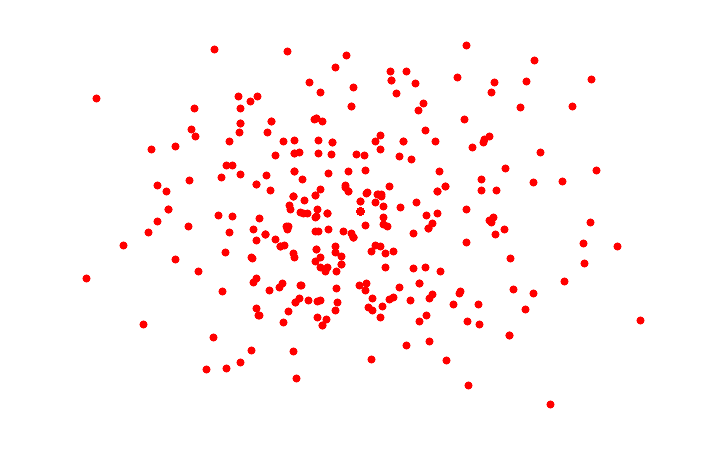

In [224]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(g, pos=nx.spectral_layout(g), edge_color='#a4a4a4', node_size=50, with_labels=False, width=50)
    plt.axis('off')

# Clustering coefficient

In [225]:
ccall = nx.clustering(g)
clustering_coefficient = nx.average_clustering(g)
clustering_coefficient

0.8173570121027742

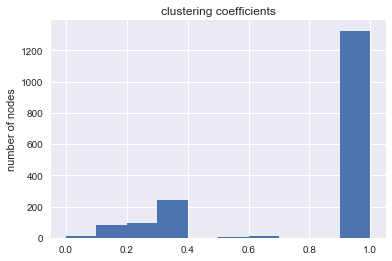

In [226]:
h,bins,patches = plt.hist(list(nx.clustering(g).values()),bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.title('clustering coefficients')
plt.ylabel("number of nodes")

# Adding Weights to the edge - Weighted Graph

In [227]:
G = nx.Graph()

In [228]:
G.add_edge(1,2,weight=1)

In [229]:
G.edges()

[(1, 2)]

In [230]:
G.get_edge_data(1,2)

{'weight': 1}

In [231]:
G.add_edge(3,4)

In [232]:
G.get_edge_data(3,4)

{}

In [233]:
G.get_edge_data(1,2)['weight']

1

In [234]:
'weight' in G.get_edge_data(3,4).keys()

False

In [235]:
G.edges(data=True)

[(1, 2, {'weight': 1}), (3, 4, {})]

In [302]:
G = nx.Graph()

In [303]:
def makeActorConnectionWithWeight(movie):
    for i, j in [(movie[0],movie[1]),(movie[0],movie[2]),(movie[1],movie[2])]:  
        #print(i,j)
        if G.has_edge(i,j):
            if 'weight' in G.get_edge_data(i,j).keys():
                weight = G.get_edge_data(i,j)['weight'] + 1
                G.add_edge(i,j, weight=weight)
                #print(weight)
            else:
                print("every edge should have a weight.")
        else:
            G.add_edge(i,j, weight=1)   
                
actor_db.apply(makeActorConnectionWithWeight,axis=1)

print(G.number_of_edges())

2534


In [312]:
G.edges(data=True)

[('Caity Lotz', 'Brandon Routh', {'weight': 1}),
 ('Caity Lotz', 'Tom Cavanagh', {'weight': 1}),
 ('Brandon Routh', 'Tom Cavanagh', {'weight': 1}),
 ('Charlotte Rampling', 'Tom Courtenay', {'weight': 1}),
 ('Charlotte Rampling', 'Dolly Wells', {'weight': 1}),
 ('Tom Courtenay', 'Dolly Wells', {'weight': 1}),
 ('Taissa Farmiga', 'Ben Rosenfield', {'weight': 1}),
 ('Taissa Farmiga', 'Lindsay Burdge', {'weight': 1}),
 ('Taissa Farmiga', 'Malin ?kerman', {'weight': 1}),
 ('Taissa Farmiga', 'Nina Dobrev', {'weight': 1}),
 ('Taissa Farmiga', 'Ethan Hawke', {'weight': 1}),
 ('Taissa Farmiga', 'James Ransone', {'weight': 1}),
 ('Ben Rosenfield', 'Lindsay Burdge', {'weight': 1}),
 ('Tilda Swinton', 'Matthias Schoenaerts', {'weight': 1}),
 ('Tilda Swinton', 'Ralph Fiennes', {'weight': 1}),
 ('Matthias Schoenaerts', 'Ralph Fiennes', {'weight': 1}),
 ('Matthias Schoenaerts', 'Carey Mulligan', {'weight': 1}),
 ('Matthias Schoenaerts', 'Michael Sheen', {'weight': 1}),
 ('Matthias Schoenaerts', 'Eddi

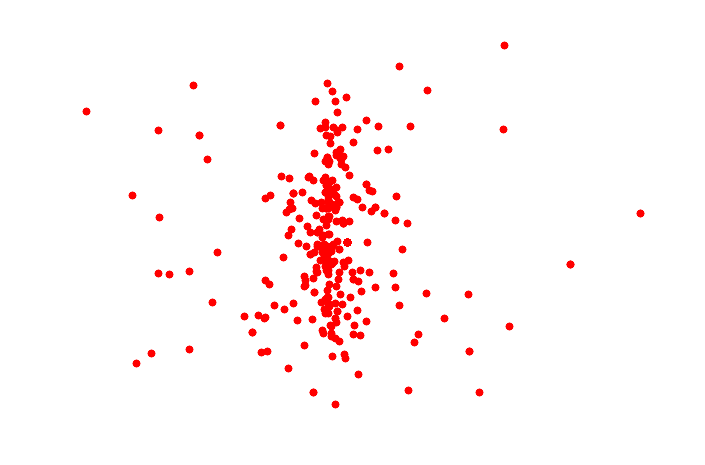

In [309]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(G, pos=nx.spectral_layout(G), edge_color='#a4a4a4', node_size=50, with_labels=False, width=50)
    plt.axis('off')

# Degree Distribution

In [240]:
nx.degree(G)

{'Caity Lotz': 2,
 'Brandon Routh': 2,
 'Tom Cavanagh': 2,
 'Charlotte Rampling': 2,
 'Tom Courtenay': 2,
 'Dolly Wells': 2,
 'Taissa Farmiga': 6,
 'Ben Rosenfield': 2,
 'Lindsay Burdge': 2,
 'Tilda Swinton': 2,
 'Matthias Schoenaerts': 6,
 'Ralph Fiennes': 2,
 'Jimmy Bennett': 2,
 'Lexi Ainsworth': 2,
 'Hunter King': 2,
 'Rolf Lassg?rd': 2,
 'Bahar Pars': 2,
 'Filip Berg': 2,
 'Olga Kurylenko': 4,
 'Benicio del Toro': 6,
 'Tim Robbins': 2,
 'Pierre Niney': 4,
 'Ana Girardot': 2,
 'Andr? Marcon': 4,
 'Sarah Gadon': 4,
 'Bel Powley': 4,
 'Emily Watson': 4,
 'Bill Murray': 6,
 'Paul Shaffer': 2,
 'George Clooney': 8,
 'Robert Redford': 4,
 'Nick Nolte': 4,
 'Emma Thompson': 4,
 'Pilou Asb?k': 2,
 'Tuva Novotny': 2,
 'S?ren Malling': 2,
 'Simon Pegg': 6,
 'Kate Beckinsale': 8,
 'Rob Riggle': 2,
 'Jake Gyllenhaal': 12,
 'Jessica Biel': 4,
 'James Marsden': 10,
 'Dani Rovira': 3,
 'Mar?a Valverde': 2,
 'Clara Lago': 3,
 'Norman Reedus': 2,
 'Djimon Hounsou': 4,
 'Sandrine Holt': 2,
 'Kheiro

In [305]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) 
dmax=max(degree_sequence)
dmax

13

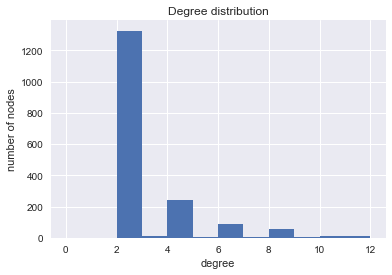

In [306]:
h,bins,patches = plt.hist(degree_sequence,bins=range(0,dmax))
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

In [307]:
from operator import itemgetter
actors_sorted_by_degree = sorted(G.degree_iter(),key=itemgetter(1),reverse=True)
actors_sorted_by_degree

[('Jesse Eisenberg', 13),
 ('Kristen Stewart', 13),
 ('Jake Gyllenhaal', 12),
 ('Rachel McAdams', 12),
 ('Joel Edgerton', 12),
 ('Kevin Hart', 12),
 ('Robert De Niro', 12),
 ('Anna Kendrick', 12),
 ('Kristen Wiig', 12),
 ('Felicity Jones', 12),
 ('Bryan Cranston', 12),
 ('Elle Fanning', 12),
 ('Nicholas Hoult', 11),
 ('Michael Fassbender', 11),
 ('James Marsden', 10),
 ('Patrick Wilson', 10),
 ('John Travolta', 10),
 ('Mia Wasikowska', 10),
 ('Steve Carell', 10),
 ('Vin Diesel', 10),
 ('Kate Winslet', 10),
 ('Teresa Palmer', 10),
 ('Owen Wilson', 10),
 ('Adam Driver', 10),
 ('Liam Hemsworth', 10),
 ('J.K. Simmons', 10),
 ('Michael Shannon', 10),
 ('Robin Williams', 10),
 ('Chris Hemsworth', 9),
 ('Mark Ruffalo', 9),
 ('Will Smith', 9),
 ('Margot Robbie', 9),
 ('Theo James', 9),
 ('George Clooney', 8),
 ('Kate Beckinsale', 8),
 ('Justin Long', 8),
 ('Hailee Steinfeld', 8),
 ('Jessica Alba', 8),
 ('Idris Elba', 8),
 ('Anthony Hopkins', 8),
 ('Tom Hanks', 8),
 ('Sienna Miller', 8),
 ('Dev

In [110]:
len(actors_sorted_by_degree)

1770

In [111]:
actors_sorted_by_degree[0:100]

[('Jesse Eisenberg', 13),
 ('Kristen Stewart', 13),
 ('Jake Gyllenhaal', 12),
 ('Rachel McAdams', 12),
 ('Joel Edgerton', 12),
 ('Kevin Hart', 12),
 ('Robert De Niro', 12),
 ('Anna Kendrick', 12),
 ('Kristen Wiig', 12),
 ('Felicity Jones', 12),
 ('Bryan Cranston', 12),
 ('Elle Fanning', 12),
 ('Nicholas Hoult', 11),
 ('Michael Fassbender', 11),
 ('James Marsden', 10),
 ('Patrick Wilson', 10),
 ('John Travolta', 10),
 ('Mia Wasikowska', 10),
 ('Steve Carell', 10),
 ('Vin Diesel', 10),
 ('Kate Winslet', 10),
 ('Teresa Palmer', 10),
 ('Owen Wilson', 10),
 ('Adam Driver', 10),
 ('Liam Hemsworth', 10),
 ('J.K. Simmons', 10),
 ('Michael Shannon', 10),
 ('Robin Williams', 10),
 ('Chris Hemsworth', 9),
 ('Mark Ruffalo', 9),
 ('Will Smith', 9),
 ('Margot Robbie', 9),
 ('Theo James', 9),
 ('George Clooney', 8),
 ('Kate Beckinsale', 8),
 ('Justin Long', 8),
 ('Hailee Steinfeld', 8),
 ('Jessica Alba', 8),
 ('Idris Elba', 8),
 ('Anthony Hopkins', 8),
 ('Tom Hanks', 8),
 ('Sienna Miller', 8),
 ('Dev

# Which actors have worked together the most (using edge weight)

In [278]:
G_df = pd.DataFrame({'Actor1':[],'Actor2':[],'weight':[]})
for edge in G.edges(data=True):
    G_df = G_df.append(pd.DataFrame({'Actor1':[edge[0]],'Actor2':[edge[1]],'weight':[edge[2]['weight']]}))
G_df.sort('weight',ascending=False)

/Users/pm/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Actor1,Actor2,weight
0,Chris Hemsworth,Mark Ruffalo,2.0
0,Nah,Jafar Panahi,2.0
0,James Badge Dale,Max Martini,2.0
0,Jason O'Mara,Stuart Allan,2.0
0,John Leguizamo,Denis Leary,2.0
0,Amy Poehler,Phyllis Smith,2.0
0,Will Smith,Margot Robbie,2.0
0,Keanu Reeves,Ana de Armas,2.0
0,John Leguizamo,Ray Romano,2.0
0,Shailene Woodley,Theo James,2.0


In [279]:
G_df.sort('weight',ascending=False)['weight'].value_counts()

/Users/pm/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


1.0    2512
2.0      22
Name: weight, dtype: int64

In [280]:
actor_name = 'Chris Hemsworth'
movie_db[(movie_db['Actor1 Name'] == actor_name) |  (movie_db['Actor2 Name'] == actor_name) |  (movie_db['Actor3 Name'] == actor_name)][['Actor1 Name','Actor2 Name','Actor3 Name','Title','release_date']]

,Actor1 Name,Actor2 Name,Actor3 Name,Title,release_date
27,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Avengers: Age of Ultron,2015-04-22
42,Chris Hemsworth,Leehom Wang,Tang Wei,Blackhat,2015-01-13
130,Chris Hemsworth,Benjamin Walker,Cillian Murphy,In the Heart of the Sea,2015-11-20
449,Chris Hemsworth,Charlize Theron,Emily Blunt,The Huntsman: Winter's War,2016-04-06
523,Chris Hemsworth,Benjamin Walker,Cillian Murphy,In the Heart of the Sea,2015-11-20
990,Chris Hemsworth,Mark Ruffalo,Daley Pearson,Team Thor,2016-08-28


# Clustering Coefficients

In [276]:
ccall = nx.clustering(G)
clustering_coefficient = nx.average_clustering(G)
clustering_coefficient

0.8173570121027761

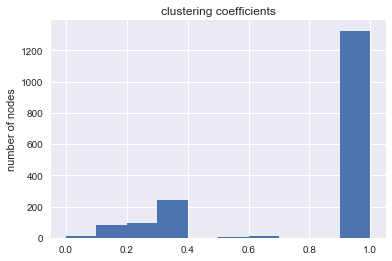

In [277]:
h,bins,patches = plt.hist(list(nx.clustering(g).values()),bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.title('clustering coefficients')
plt.ylabel("number of nodes")

# HELP: Graph with weighted edges - need to fix why edges not being rendered

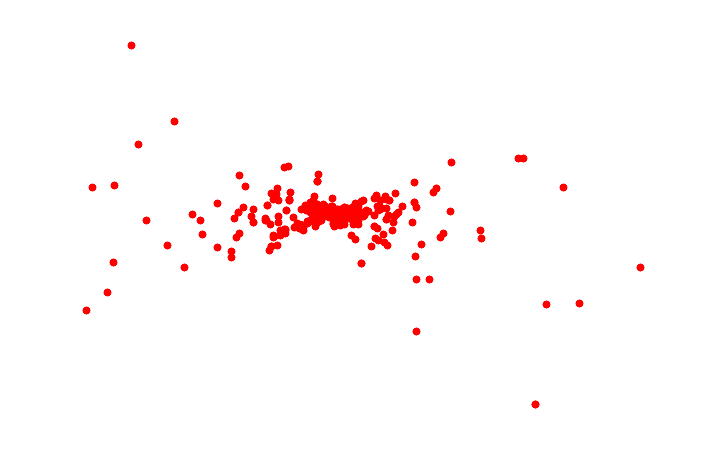

In [283]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(G, pos=nx.spectral_layout(G), edge_color='#a4a4a4', node_size=50, with_labels=False, width=50)
    plt.axis('off')

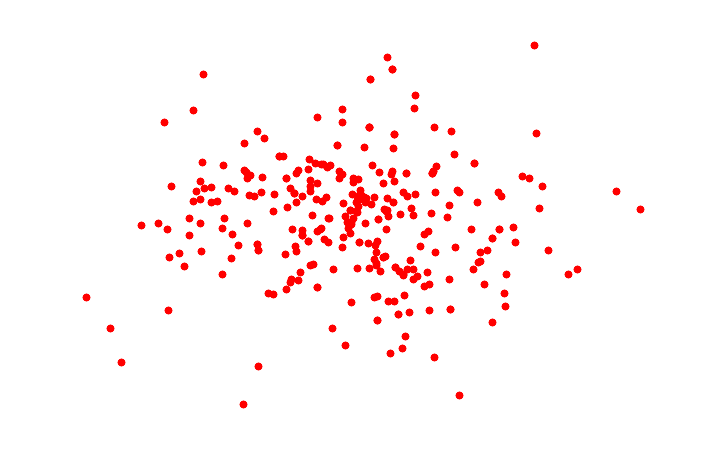

In [301]:
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(G, pos=nx.spectral_layout(G), edge_color='#a4a4a4', node_size=50, with_labels=False, width=weights)
    plt.axis('off')